# Our Analysis of the Effect of The George Floyd Killing on Minneapolis Crime.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib.pyplot import figure
from sklearn import datasets
from scipy.stats import linregress
import datetime

In [2]:
#Load Dataset
file = "Resources/crime_data.csv"

crime_data = pd.read_csv(file)

crime_df = pd.DataFrame(crime_data)
#crime_df.head(10)

In [3]:
del crime_df["neighborhoodCrimeStatisticsID"]
#crime_df

In [4]:
#Start of Ryan's Code
#Data Clean up
crime_df = crime_df.rename(columns={
    "neighborhood" : "Neighborhood",
    "ucrDescription" : "Crime",
    "number" : "Number of Cases",
    "reportMonth" : "Month",
    "reportYear" : "Year"
})
#crime_df

crime_df["Date"] = crime_df["Month"].astype(str) +"/"+ crime_df["Year"].astype(str)
#crime_df["Neighborhood"].unique()

In [5]:
#Cleaning Up Neighborhoods
crime_df["Neighborhood"] = crime_df["Neighborhood"].replace({
    '** NOT ASSIGNED **' : "Unknown",
    'Z_** NOT ASSIGNED **' : "Unknown",
    'ARMATAGE' : 'Armatage',
    'AUDUBON PARK' : 'Audubon Park',
    'BANCROFT' : 'Bancroft',
    'BELTRAMI' : 'Beltrami',
    'BOTTINEAU' : 'Bottineau',
    'BRYANT' : 'Bryant',
    'BRYN - MAWR' : 'Bryn - Mawr',
    'CAMDEN INDUSTRIAL' :'Camden Industrial',
    'CARAG' : "Carag",
    'CEDAR - ISLES - DEAN' : 'Cedar - Isles - Dean',
    'CEDAR RIVERSIDE' : 'Cedar Riverside',
    'CENTRAL' : 'Central',
    'CLEVELAND' : 'Cleveland',
    'COLUMBIA PARK' : 'Columbia Park',
    'COMO' : 'Como',
    'COOPER' : 'Cooper',
    'CORCORAN' : 'Corcoran',
    'DIAMOND LAKE' : 'Diamond Lake',
    'DOWNTOWN EAST' : 'Downtown East',
    'DOWNTOWN WEST' : 'Downtown West',
    'EAST HARRIET' : 'East Harriet',
    'EAST ISLES' : 'East Isles',
    'EAST PHILLIPS' : 'East Phillips',
    'ECCO' : "Ecco",
    'ELLIOT PARK' : 'Elliot Park',
    'ERICSSON' : 'Ericsson',
    'FIELD' : 'Field',
    'FOLWELL' : 'Folwell',
    'FULTON' : 'Fulton',
    'HALE' : 'Hale',
    'HARRISON' : 'Harrison',
    'HAWTHORNE' : 'Hawthorne',
    'HIAWATHA' : 'Hiawatha',
    'HOLLAND' : 'Holland',
    'HOWE' : 'Howe',
    'HUMBOLDT INDUSTRIAL AREA' : 'Humboldt Industrial Area',
    'JORDAN' : 'Jordan',
    'KEEWAYDIN' : 'Keewaydin',
    'KENNY' : 'Kenny', 
    'KENWOOD' : 'Kenwood', 
    'KING FIELD' : 'King Field', 
    'LIND - BOHANON' : 'Lind - Bohanon',
    'LINDEN HILLS' : 'Linden Hills', 
    'LOGAN PARK' : 'Logan Park', 
    'LONGFELLOW' : 'Longfellow', 
    'LORING PARK' : 'Loring Park',
    'LOWRY HILL' : 'Lowry Hill', 
    'LOWRY HILL EAST' : 'Lowry Hill East', 
    'LYNDALE' : 'Lyndale', 
    'LYNNHURST' : 'Lynnhurst',
    'MARCY HOLMES' : 'Marcy Holmes', 
    'MARSHALL TERRACE' : 'Marshall Terrace', 
    'MCKINLEY' : 'McKinley',
    'MID - CITY INDUSTRIAL' : 'Mid - City Industrial', 
    'MIDTOWN PHILLIPS' : 'Midtown Phillips', 
    'MINNEHAHA' : 'Minnehaha',
    'MORRIS PARK' : 'Morris Park', 
    'NEAR - NORTH' : 'Near - North', 
    'NICOLLET ISLAND - EAST BANK' : 'Nicollet Island - East Bank',
    'NORTH LOOP' : 'North Loop', 
    'NORTHEAST PARK' : 'Northeast Park', 
    'NORTHROP' : 'Northrop', 
    'PAGE' : 'Page',
    'PHILLIPS WEST' : 'Phillips West', 
    'POWDERHORN PARK' : 'Powderhorn Park',
    'PROSPECT PARK - EAST RIVER ROAD' : 'Prospect Park - East River Road', 
    'REGINA' : 'Regina', 
    'SEWARD' : 'Seward', 
    'SHERIDAN' : 'Sheridan',
    'SHINGLE CREEK' : 'Shingle Creek', 
    'ST. ANTHONY EAST' : 'St. Anthony East', 
    'ST. ANTHONY WEST' : 'St. Anthony West',
    'STANDISH' : 'Standish', 
    'STEVENS SQUARE - LORING HEIGHTS' : "Steven's Square - Loring Heights", 
    'SUMNER - GLENWOOD' : 'Sumner - Glenwood',
    'TANGLETOWN' : 'Tangletown', 
    'UNIVERSITY OF MINNESOTA' : 'University of Minnesota', 
    'VENTURA VILLAGE' : 'Ventura Village',
    'VICTORY' : 'Victory', 
    'WAITE PARK' : 'Waite Park', 
    'WEBBER - CAMDEN' : 'Webber - Camden', 
    'WENONAH' : 'Wenonah',
    'WEST CALHOUN' : 'West Calhoun', 
    'WHITTIER' : 'Whittier', 
    'WILLARD - HAY' : 'Willard - Hay', 
    'WINDOM' : 'Windom',
    'WINDOM PARK' : 'Windom Park',
    "CARAG" : "South Uptown",
    'ECCO' : "East Bde Maka Ska",
    "West Calhoun" : "West Maka Ska"
})
#crime_df["Neighborhood"].unique()

In [6]:
#More Clean up
#Removing the no-named Neighborhoods
crime_df = crime_df[crime_df["Neighborhood"] != "Unknown"]
#crime_df

#Removing data outside our timeline
crime_df = crime_df[crime_df["Year"] > 2017]

#Fill NaN
crime_df["Number of Cases"] = crime_df["Number of Cases"].fillna(0)
#crime_df.head(10)

In [7]:
#End of Ryan's Code
#Final Cleaned DataFrame
crime_df = crime_df[["Neighborhood","Crime","Number of Cases","Date"]]
crime_df1 = crime_df[["Neighborhood","Crime","Number of Cases","Date"]]
crime_df.set_index(keys="Date",inplace=True)
crime_df1.set_index(keys="Neighborhood",inplace=True)

In [8]:
#Start of Ilia's Code
crime_df1["Date"]=pd.to_datetime(crime_df1["Date"], format="%m/%Y")
crime_df1.head(10)

,Crime,Number of Cases,Date
Neighborhood,,,
Armatage,Aggravated Assault,0.0,2018-01-01
Armatage,Arson,0.0,2018-01-01
Armatage,Auto Theft,0.0,2018-01-01
Armatage,Burglary,0.0,2018-01-01
Armatage,Homicide,0.0,2018-01-01
Armatage,Larceny,5.0,2018-01-01
Armatage,Rape,0.0,2018-01-01
Armatage,Robbery,1.0,2018-01-01
Audubon Park,Aggravated Assault,0.0,2018-01-01


In [9]:
df_plt=crime_df1.groupby("Date").sum()
df_plt.reset_index(inplace=True)
df_plt.head()

,Date,Number of Cases
0,2018-01-01,1555.0
1,2018-02-01,1382.0
2,2018-03-01,1535.0
3,2018-04-01,1390.0
4,2018-05-01,1792.0


In [10]:
crimes_before = crime_df1[(crime_df1["Date"] >= "2018-06-01") & (crime_df1["Date"] < "2020-06-01")]

crimes_before

,Crime,Number of Cases,Date
Neighborhood,,,
Armatage,Aggravated Assault,0.0,2018-06-01
Armatage,Arson,0.0,2018-06-01
Armatage,Auto Theft,0.0,2018-06-01
Armatage,Burglary,1.0,2018-06-01
Armatage,Homicide,0.0,2018-06-01
...,...,...,...
Windom Park,Burglary,6.0,2020-05-01
Windom Park,Homicide,0.0,2020-05-01
Windom Park,Larceny,3.0,2020-05-01


In [11]:
crimes_after=crime_df1[(crime_df1['Date']> "2020-05-01")]

crimes_after

,Crime,Number of Cases,Date
Neighborhood,,,
Armatage,Aggravated Assault,1.0,2020-06-01
Armatage,Arson,0.0,2020-06-01
Armatage,Auto Theft,2.0,2020-06-01
Armatage,Burglary,1.0,2020-06-01
Armatage,Homicide,0.0,2020-06-01
...,...,...,...
Windom Park,Burglary,0.0,2022-06-01
Windom Park,Homicide,0.0,2022-06-01
Windom Park,Larceny,11.0,2022-06-01


In [12]:
before_df_plt=crimes_before.groupby("Date").sum()
before_df_plt.reset_index(inplace=True)
before_df_plt

,Date,Number of Cases
0,2018-06-01,1764.0
1,2018-07-01,1878.0
2,2018-08-01,1832.0
3,2018-09-01,1849.0
4,2018-10-01,1930.0
5,2018-11-01,1667.0
6,2018-12-01,1539.0
7,2019-01-01,1514.0
8,2019-02-01,1237.0
9,2019-03-01,1385.0


In [13]:
After_df_plt=crimes_after.groupby("Date").sum()
After_df_plt.reset_index(inplace=True)
After_df_plt

,Date,Number of Cases
0,2020-06-01,2010.0
1,2020-07-01,2439.0
2,2020-08-01,2502.0
3,2020-09-01,2299.0
4,2020-10-01,2267.0
5,2020-11-01,1969.0
6,2020-12-01,1744.0
7,2021-01-01,1641.0
8,2021-02-01,1431.0
9,2021-03-01,1434.0


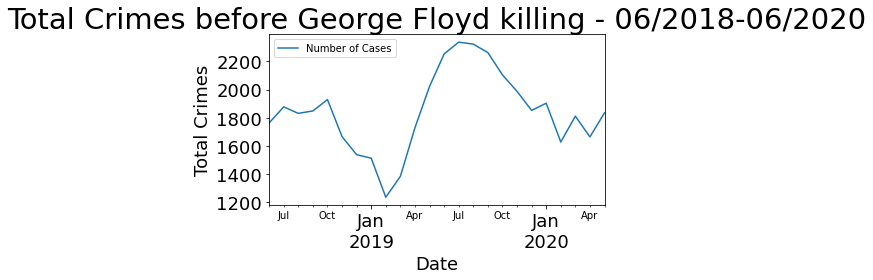

In [14]:
# Total Crimes before George Floyd killing for 06/2018-06/2020 periods
before_df_plt.plot(kind='line', x='Date', y='Number of Cases')

plt.title('Total Crimes before George Floyd killing - 06/2018-06/2020',fontsize =29)

plt.xlabel('Date',fontsize =18)
plt.ylabel('Total Crimes',fontsize =18)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig("Images/total_crime_before_george.png")

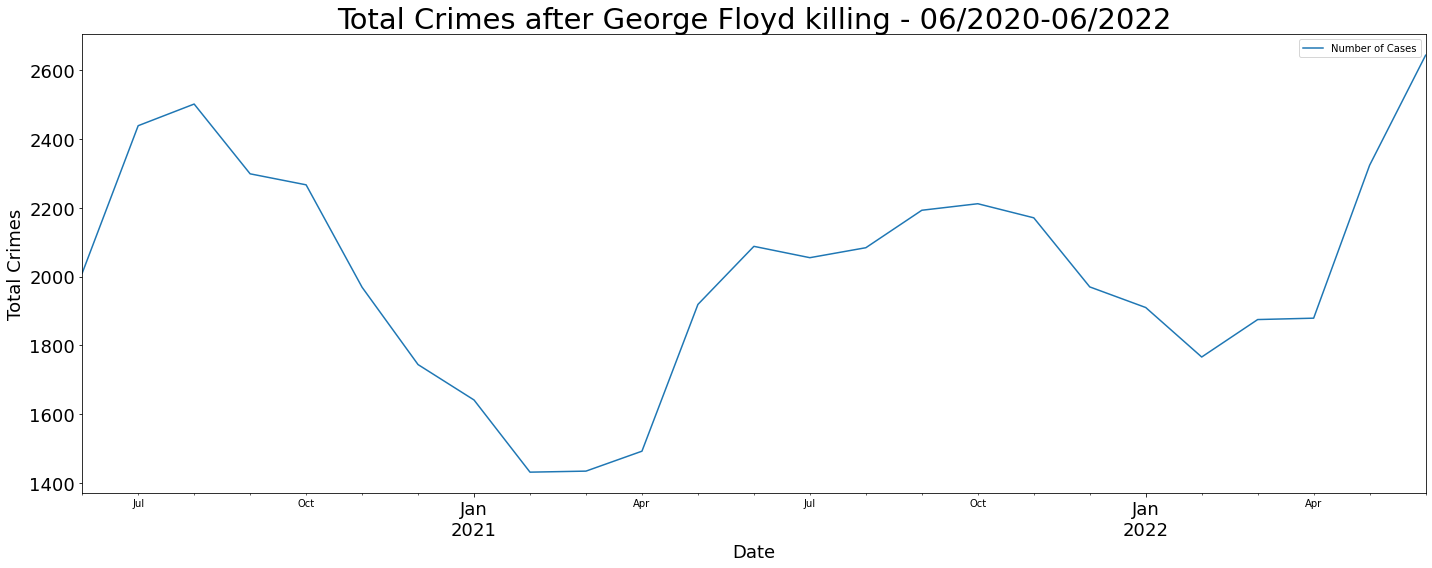

In [15]:
# Total Crimes after George Floyd killing for 06/2020-06/2022 periods
After_df_plt.plot(kind='line', x='Date', y='Number of Cases')

plt.title('Total Crimes after George Floyd killing - 06/2020-06/2022',fontsize =29)

plt.xlabel('Date',fontsize =18)
plt.ylabel('Total Crimes',fontsize =18)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig("Images/total_crime_after_george.png")

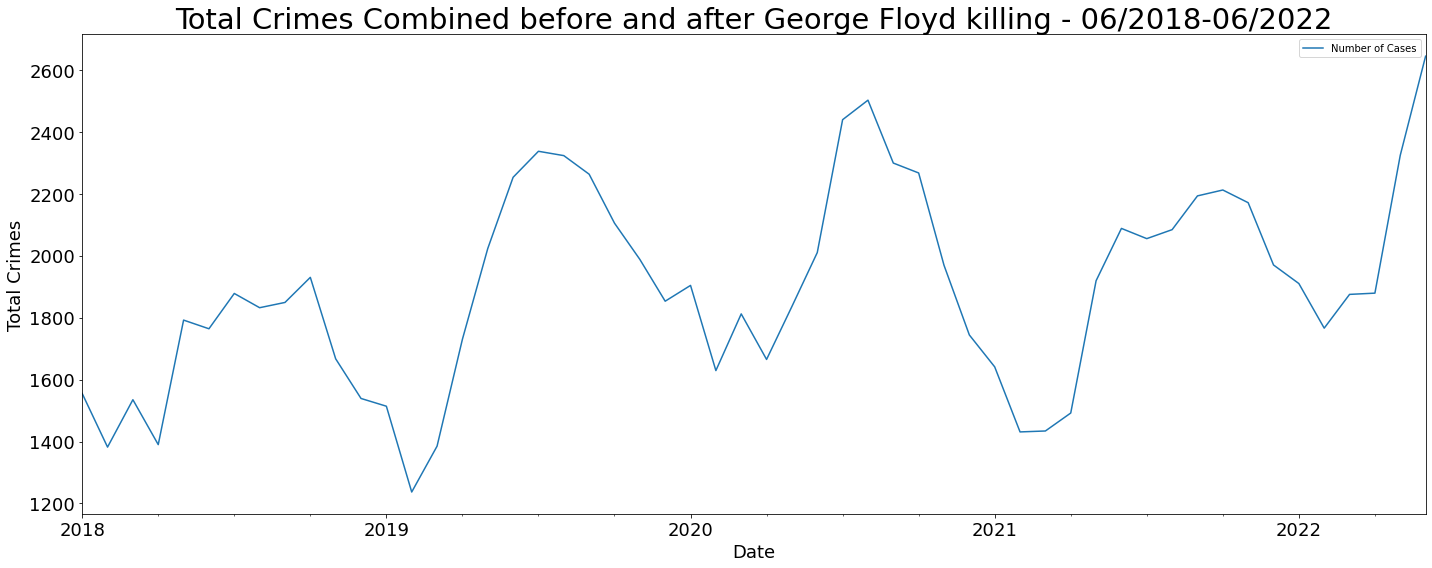

In [16]:
#End of Ilia's Code
# Total Crimes combined for 06/2018-06/2022 periods
df_plt.plot(kind='line', x='Date', y='Number of Cases')

plt.title('Total Crimes Combined before and after George Floyd killing - 06/2018-06/2022',fontsize =29)

plt.xlabel('Date',fontsize =18)
plt.ylabel('Total Crimes',fontsize =18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax = df_plt.plot()
# df_plt.axvline("2020-06-01", color="green", linestyle="dashed")

plt.rcParams["figure.figsize"] = (19,8)
plt.tight_layout()
plt.savefig("Images/total_crime_combined_george.png")

# Ilia's Analysis 

### During a 2-year period before the George Floyd event, the total crime cases reflect ups and downs.  The crime cases  significantly increased after February 2019 and went down from July 2019. The crime cases remained relatively stable until the George Floyd event with the slight changes.

### The crime noticeably increased for a few months after the George Floyd event, and it started to decline from August 2020 to February 2021. After February, it started to increase again, the same as it was shown before the George Floyd killing.

### The line plot of total crimes combined before and after the George Floyd killing reflects a 4-year period, two years before and after the event. Based on the graph, the crime rates increased after the George Floyd killing but at the same time the trend remained the same. The crime rate tends to increase during Spring and Summer, and starts to decrease in Fall and Winter. The George Floyd killing did not reflect a significant impact on the total crime in Minneapolis. However, some of the neighborhoods in Minneapolis were negatively impacted, which is detailed in the analysis below.

In [17]:
#Start of Ryan's Code
#Crime Before Vs After
crime_df.head(20)

crime_df.to_csv("Resources/crime.csv")
crime_df1.to_csv("Resources/crime1.csv")
gf_df = crime_df.loc["4/2020":"6/2020",:]
gf_df.to_csv("Resources/george_floyd.csv")
before_df = crime_df.loc["5/2018":"5/2020",:]
before_df.to_csv("Resources/before_floyd.csv")
after_df = crime_df.loc["6/2020":,:]
after_df.to_csv("Resources/after_floyd.csv")

In [18]:
#Start of Ryan's Code
#Before Violent DataFrame
before_violent_df = before_df[before_df["Crime"]!="Arson"]
before_violent_df = before_violent_df[before_violent_df["Crime"]!="Auto Theft"]
before_violent_df = before_violent_df[before_violent_df["Crime"]!="Burglary"]
before_violent_df = before_violent_df[before_violent_df["Crime"]!="Larceny"]
#before_violent_df

before_violent_cases = before_violent_df.groupby("Crime")[["Crime","Number of Cases"]].sum()
before_violent_cases_list = before_violent_cases["Number of Cases"].values.tolist()
#before_violent_cases

#After Violent DataFrame
after_violent_df = after_df[after_df["Crime"]!="Arson"]
after_violent_df = after_violent_df[after_violent_df["Crime"]!="Auto Theft"]
after_violent_df = after_violent_df[after_violent_df["Crime"]!="Burglary"]
after_violent_df = after_violent_df[after_violent_df["Crime"]!="Larceny"]
#after_violent_df

after_violent_cases = after_violent_df.groupby("Crime")[["Crime","Number of Cases"]].sum()
after_violent_cases_list = after_violent_cases["Number of Cases"].values.tolist()
#after_violent_cases

#Set Tick Names
violent_ticks = before_violent_df["Crime"].unique().tolist()

x_axis = np.arange(0,4,1)

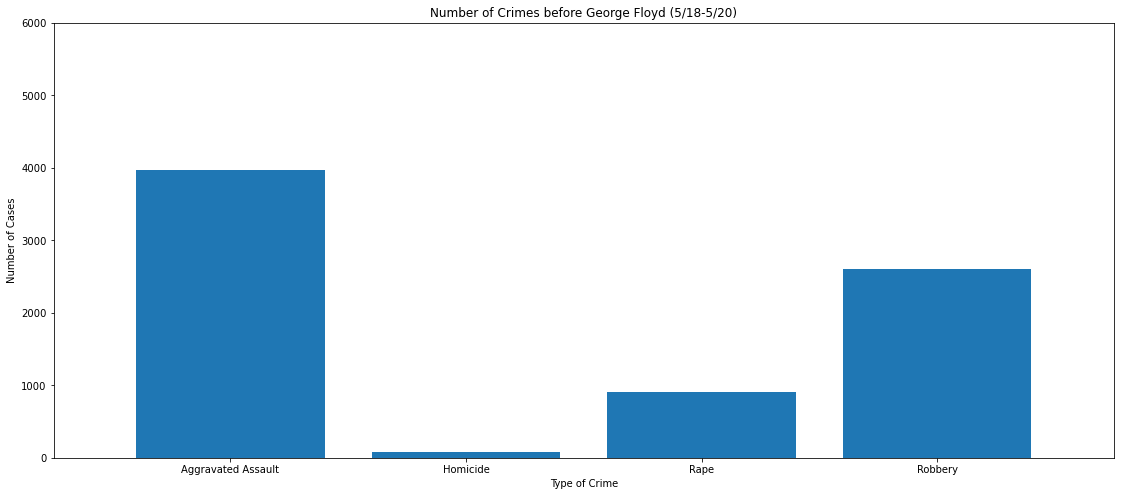

In [19]:
#Before Violent Visualization
before_violent_bar = plt.bar(x_axis,before_violent_cases_list,align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, violent_ticks)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 6000)

plt.title("Number of Crimes before George Floyd (5/18-5/20)")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Cases")
plt.savefig("Images/before_violent_crimes.jpeg")
plt.show()

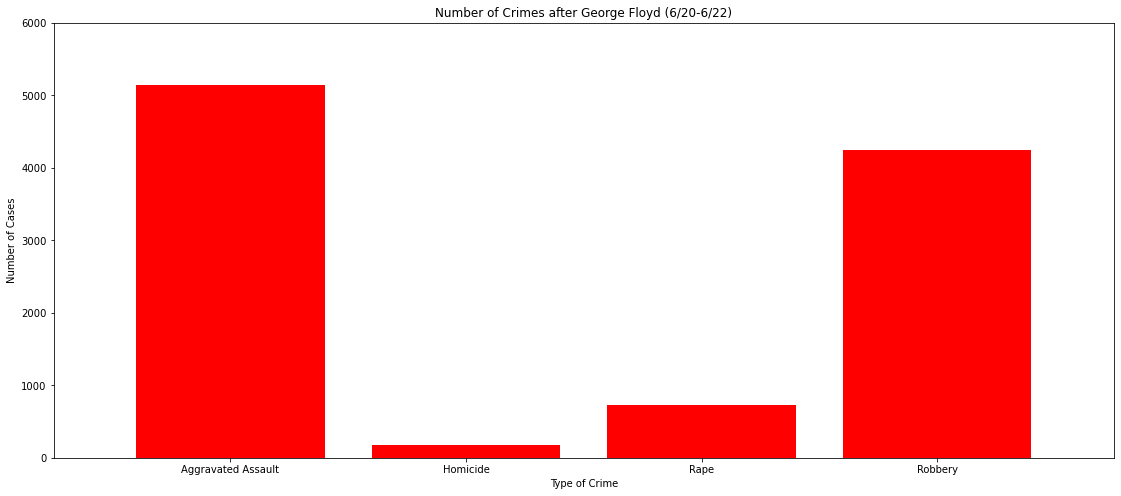

In [20]:
#After Violent Visualization
after_violent_bar = plt.bar(x_axis,after_violent_cases_list,align="center",color="red")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, violent_ticks)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 6000)

plt.title("Number of Crimes after George Floyd (6/20-6/22)")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Cases")
plt.savefig("Images/after_violent_crimes.jpeg")
plt.show()

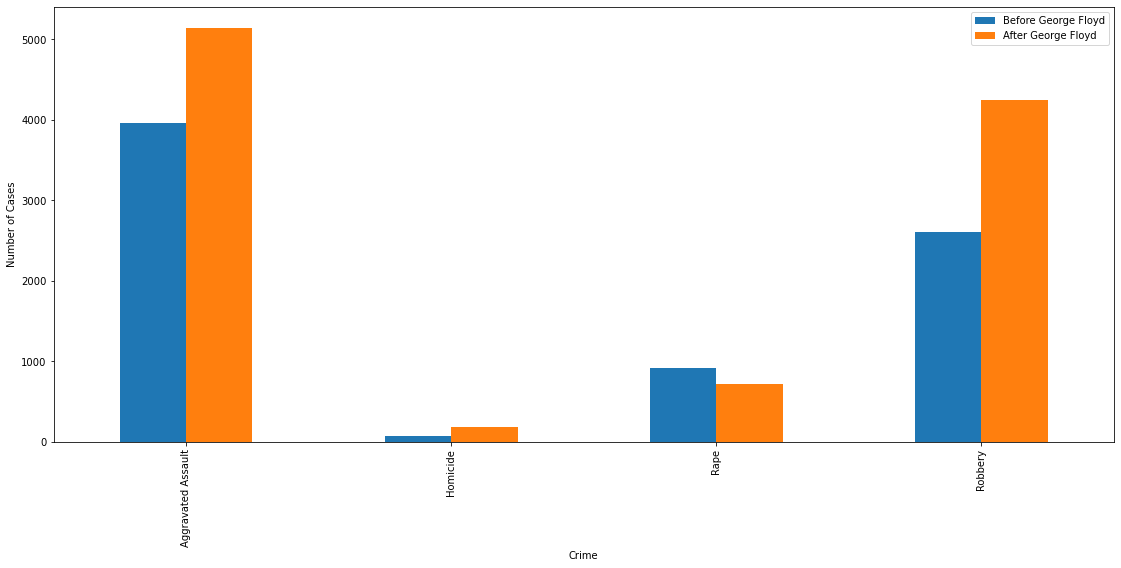

In [21]:
#Combined Violent Visualization
combined_violent_df = pd.DataFrame(before_violent_cases)
combined_violent_df["After George Floyd"] = after_violent_cases
combined_violent_df.rename(columns=({"Number of Cases" : "Before George Floyd"}),inplace=True)
combined_violent_df.plot.bar(ylabel="Number of Cases")
plt.savefig("Images/combined_violent_crimes.jpeg")
plt.show()

In [22]:
#Before Property DataFrame
before_property_df = before_df[before_df["Crime"]!="Aggravated Assault"]
before_property_df = before_property_df[before_property_df["Crime"]!="Homicide"]
before_property_df = before_property_df[before_property_df["Crime"]!="Rape"]
before_property_df = before_property_df[before_property_df["Crime"]!="Robbery"]
#before_property_df

before_property_cases = before_property_df.groupby("Crime")[["Crime","Number of Cases"]].sum()
before_property_cases_list = before_property_cases["Number of Cases"].values.tolist()
#before_property_cases

#After Property DataFrame
after_property_df = after_df[after_df["Crime"]!="Aggravated Assault"]
after_property_df = after_property_df[after_property_df["Crime"]!="Homicide"]
after_property_df = after_property_df[after_property_df["Crime"]!="Rape"]
after_property_df = after_property_df[after_property_df["Crime"]!="Robbery"]
#after_property_df

after_property_cases = after_property_df.groupby("Crime")[["Crime","Number of Cases"]].sum()
after_property_cases_list = after_property_cases["Number of Cases"].values.tolist()
#after_property_cases

#Set Tick Names
property_ticks = before_property_df["Crime"].unique().tolist()

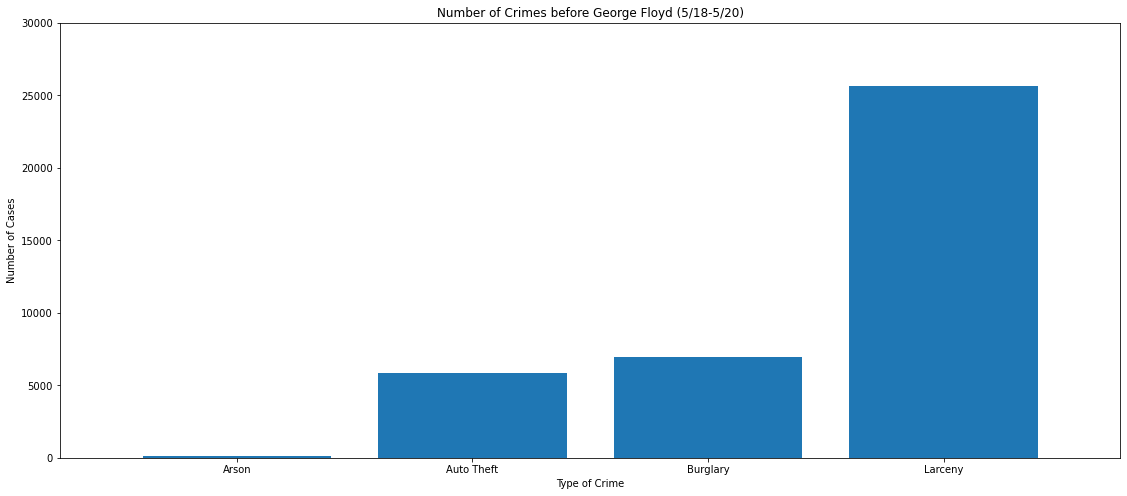

In [23]:
#Before Property Visualization
before_property_bar = plt.bar(x_axis,before_property_cases_list,align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, property_ticks)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 30000)

plt.title("Number of Crimes before George Floyd (5/18-5/20)")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Cases")
plt.savefig("Images/before_property_crimes.jpeg")
plt.show()

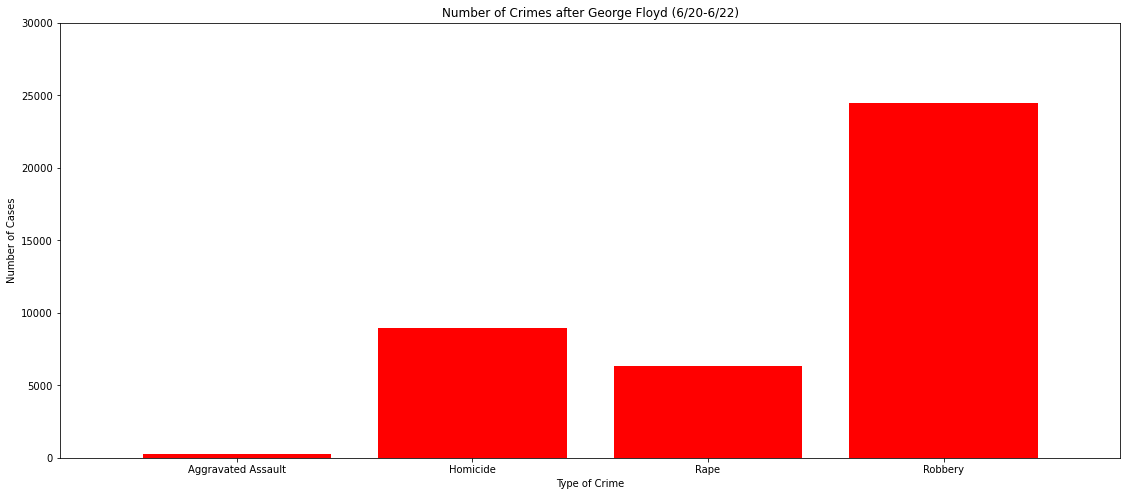

In [24]:
#After Property Visualization
after_property_bar = plt.bar(x_axis,after_property_cases_list,align="center",color="red")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, violent_ticks)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 30000)

plt.title("Number of Crimes after George Floyd (6/20-6/22)")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Cases")
plt.savefig("Images/after_property_crimes.jpeg")
plt.show()

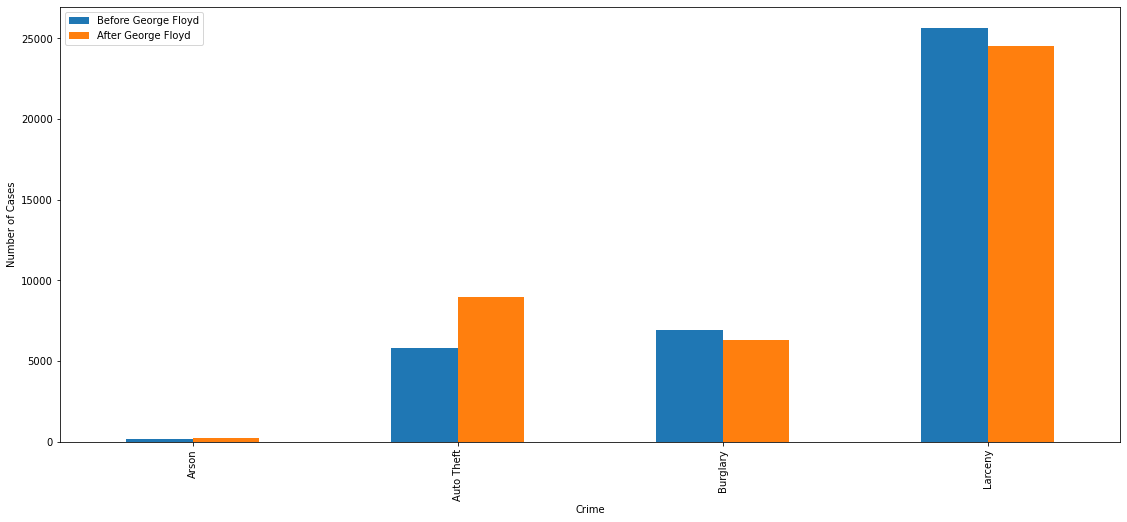

In [25]:
#End of Ryan's Code
#Combined Violent Visualization
combined_property_df = pd.DataFrame(before_property_cases)
combined_property_df["After George Floyd"] = after_property_cases
combined_property_df.rename(columns=({"Number of Cases" : "Before George Floyd"}),inplace=True)
combined_property_df.plot.bar(ylabel="Number of Cases")
plt.savefig("Images/combined_property_crimes.jpeg")
plt.show()

# Ryan's Analysis

### Based off of the data for 2 years before and 2 years after the George Floyd event, you can see that violent crimes rates rose (excluding rape) and that property crime rates of arson and theft rose but burglary and larceny fell.

### Before the George Floyd event there were a total of  46,108 crimes reported in the previous 2 years but after there were 50,318 crimes reported which is roughly a 9% increase.

### Violent crimes before the George Floyd event totaled 7,558 while after they totaled 10,304 cases. This tracks to roughly a 36% increase in violent crimes.

In [26]:
#Start of Loukya's
#Crime data before George Floyd incident
crimedatab4_df = crime_df.loc["6/2018":"5/2020", :]
crimedatab4_df

,Neighborhood,Crime,Number of Cases
Date,,,
6/2018,Armatage,Aggravated Assault,0.0
6/2018,Armatage,Arson,0.0
6/2018,Armatage,Auto Theft,0.0
6/2018,Armatage,Burglary,1.0
6/2018,Armatage,Homicide,0.0
...,...,...,...
5/2020,Windom Park,Burglary,6.0
5/2020,Windom Park,Homicide,0.0
5/2020,Windom Park,Larceny,3.0


In [27]:
#Crime data after George Floyd incident
crimedata_after_df = crime_df.loc["6/2020":, :]
crimedata_after_df

,Neighborhood,Crime,Number of Cases
Date,,,
6/2020,Armatage,Aggravated Assault,1.0
6/2020,Armatage,Arson,0.0
6/2020,Armatage,Auto Theft,2.0
6/2020,Armatage,Burglary,1.0
6/2020,Armatage,Homicide,0.0
...,...,...,...
6/2022,Windom Park,Burglary,0.0
6/2022,Windom Park,Homicide,0.0
6/2022,Windom Park,Larceny,11.0


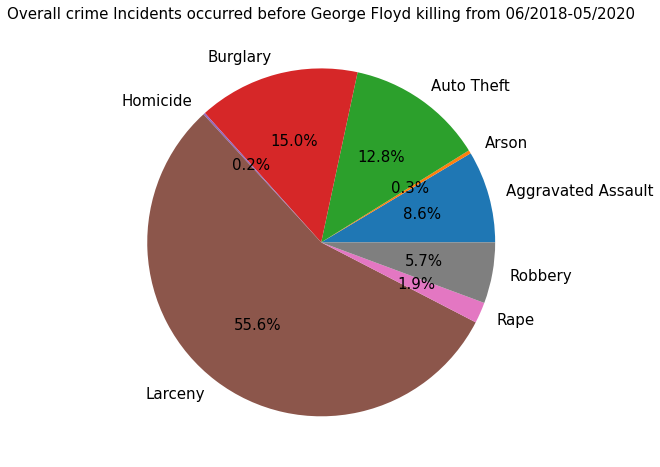

<Figure size 288x432 with 0 Axes>

In [28]:
# Create a piechart with crime data before George floyd incident
data1 = crimedatab4_df.groupby(["Crime"]).sum()
crime_labels = data1.index
x_axis = data1["Number of Cases"]
plt.pie(x_axis, labels= crime_labels, autopct = "%1.1f%%", radius=1.0, textprops ={"fontsize":15})
plt.title("Overall crime Incidents occurred before George Floyd killing from 06/2018-05/2020", fontsize=15, loc="center")
plt.figure(figsize=(4,6))
plt.tight_layout()
#plt.savefig("Images/pie_before.jpeg")
plt.show()

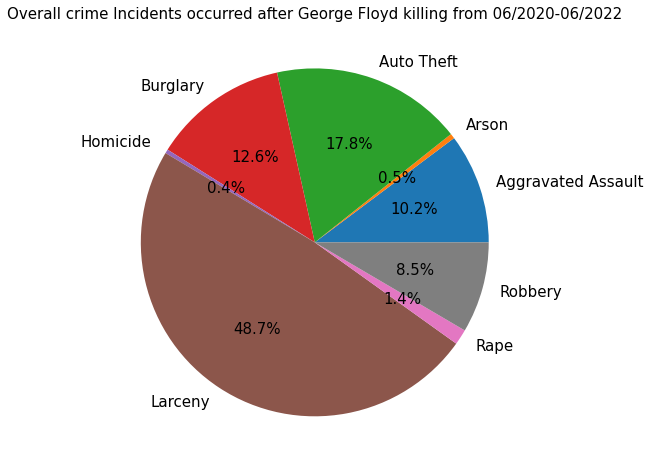

<Figure size 432x432 with 0 Axes>

In [29]:
#End of Loukya's Code
# Create a piechart with crime data after George floyd incident
data2 = crimedata_after_df.groupby(["Crime"]).sum()
crime_labels = data2.index
x_axis = data2["Number of Cases"]
plt.pie(x_axis, labels= crime_labels, autopct = "%1.1f%%", radius=1.0, textprops ={"fontsize":15})
plt.title("Overall crime Incidents occurred after George Floyd killing from 06/2020-06/2022", loc="center", fontsize=15)
plt.figure(figsize=(6,6))
plt.tight_layout()
#plt.savefig("Images/pie_after.jpeg")
plt.show()

# Loukya's Analysis

### We can say that before the incident Larceny accounts for almost 55.6% of the total crime whereas it is reduced to 48.7% after the incident.

### There is an increase in Auto Theft and Robbery after the incident from 12.8% to 17.8% and   from 5.7% to 8.5% respectively.

### Crimes like Homicide and Arson also increased by little percentage.

### Crime rate of Burglary and Rape reduced after the incident.

### Aggravated assault also increased after the incident.

In [30]:
#Start of William's Code
pd.options.display.max_rows = 1000

df = pd.read_csv("Resources/mpls_crime_2017-2022.csv", encoding="utf-8")

In [31]:
def cleanup_df(a_df):
     
    a_df["number"] = a_df["number"].fillna(0)
    
    a_df["neighborhood"] = a_df["neighborhood"].str.lower()    
           
    a_df["neighborhood"] = a_df["neighborhood"].replace({"carag":"south uptown", "ecco":"east bde maka ska", "west calhoun":"west maka ska"})
    
    a_df["neighborhood"] = a_df["neighborhood"].replace({"stevens square - loring heights":"steven's square - loring heights"})
    
    a_df = a_df.loc[(a_df["neighborhood"] != "z_** not assigned **") & (a_df["neighborhood"] != "** not assigned **")]
    
    a_df = a_df.drop("neighborhoodCrimeStatisticsID", axis=1)
            
    return a_df

In [32]:
# Breakpoint

clean_df = cleanup_df(df)

df = clean_df.copy()

In [33]:
# Mpls Neighborhood "Communities"

CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]
CAMDEN =        ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", \
                 "shingle creek", "victory", "webber - camden"]
CENTRAL =       ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]
LONGFELLOW =    ["cooper", "hiawatha", "howe", "longfellow", "seward"]
NEAR_NORTH =    ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]
NOKOMIS =       ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
                 "northrop", "page", "regina", "wenonah"]
NORTHEAST =     ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
                 "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]
PHILLIPS =      ["east phillips", "midtown phillips", "phillips west", "ventura village"]
POWDERHORN =    ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]
SOUTHWEST =     ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", \
                 "windom"]
UNIVERSITY =    ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", \
                 "prospect park - east river road", "university of minnesota"]

In [34]:
# Make list of communities names, each a list of neighborhoods

COMMUNITIES =   ["CALHOUN_ISLES", "CAMDEN", "CENTRAL", "LONGFELLOW", "NEAR_NORTH", "NOKOMIS", "NORTHEAST", \
                 "PHILLIPS", "POWDERHORN", "SOUTHWEST", "UNIVERSITY"]

In [35]:
# As per FBI ucr reporting standards

VIOLENT_CRIMES =  ["Aggravated Assault", "Homicide", "Rape", "Robbery"]
PROPERTY_CRIMES = ["Arson", "Auto Theft", "Burglary", "Larceny"]

In [36]:
# All crime 

before_all = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) ]
before_all = before_all.sort_values(by=["neighborhood", "ucrDescription"])

before_all = before_all.drop(["reportMonth", "reportYear"], axis=1)

# before_all


after_all = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) ]
after_all = after_all.sort_values(by=["neighborhood", "ucrDescription"])

after_all = after_all.drop(["reportMonth", "reportYear"], axis=1)

# after_all

In [37]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(VIOLENT_CRIMES)) ]
before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])

before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)

# before_violent["number"].describe()

In [38]:
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(VIOLENT_CRIMES)) ]
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])

after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

# after_violent["number"].describe()

In [39]:
before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(PROPERTY_CRIMES)) ]
before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])

before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)

# before_property["number"].describe()

In [40]:
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(PROPERTY_CRIMES)) ]
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])

after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

# after_property["number"].describe()

In [41]:
CALH_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [42]:
CALH_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [43]:
CALH_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bp = int(before_property.loc[ (before_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bp = int(before_property.loc[ (before_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bp = int(before_property.loc[ (before_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [44]:
CALH_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_ap = int(after_property.loc[ (after_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_ap = int(after_property.loc[ (after_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_ap = int(after_property.loc[ (after_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [45]:
CALH_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())

In [46]:
CALH_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [47]:
bp = [CALH_bp, CAMD_bp, CENT_bp, LONG_bp, NEAR_bp, NOKO_bp, NORT_bp, PHIL_bp, POWD_bp, SOUT_bp, UNIV_bp]
ap = [CALH_ap, CAMD_ap, CENT_ap, LONG_ap, NEAR_ap, NOKO_ap, NORT_ap, PHIL_ap, POWD_ap, SOUT_ap, UNIV_ap]

bv = [CALH_bv, CAMD_bv, CENT_bv, LONG_bv, NEAR_bv, NOKO_bv, NORT_bv, PHIL_bv, POWD_bv, SOUT_bv, UNIV_bv]
av = [CALH_av, CAMD_av, CENT_av, LONG_av, NEAR_av, NOKO_av, NORT_av, PHIL_av, POWD_av, SOUT_av, UNIV_av]

In [48]:
b_all = [CALH_before_all, CAMD_before_all, CENT_before_all, LONG_before_all, \
         NEAR_before_all, NOKO_before_all, NORT_before_all, PHIL_before_all, \
         POWD_before_all, SOUT_before_all, UNIV_before_all]

In [49]:
a_all = [CALH_after_all, CAMD_after_all, CENT_after_all, LONG_after_all, NEAR_after_all, \
         NOKO_after_all, NORT_after_all, PHIL_after_all, POWD_after_all, SOUT_after_all, UNIV_after_all]

In [50]:
plot_df_prop = pd.DataFrame(index=COMMUNITIES, data={"Property_Before":bp, "Property_After":ap, \
                                                     "%_Change": 0, "Difference":0})

plot_df_viol = pd.DataFrame(index=COMMUNITIES, data={"Violent_Before":bv, "Violent_After":av, \
                                                     "%_Change": 0, "Difference":0})
   
plot_df_prop["%_Change"] = (plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]) / plot_df_prop["Property_Before"] * 100
plot_df_viol["%_Change"] = (plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]) / plot_df_viol["Violent_Before"] * 100

plot_df_prop["Difference"] = plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]
plot_df_viol["Difference"] = plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]

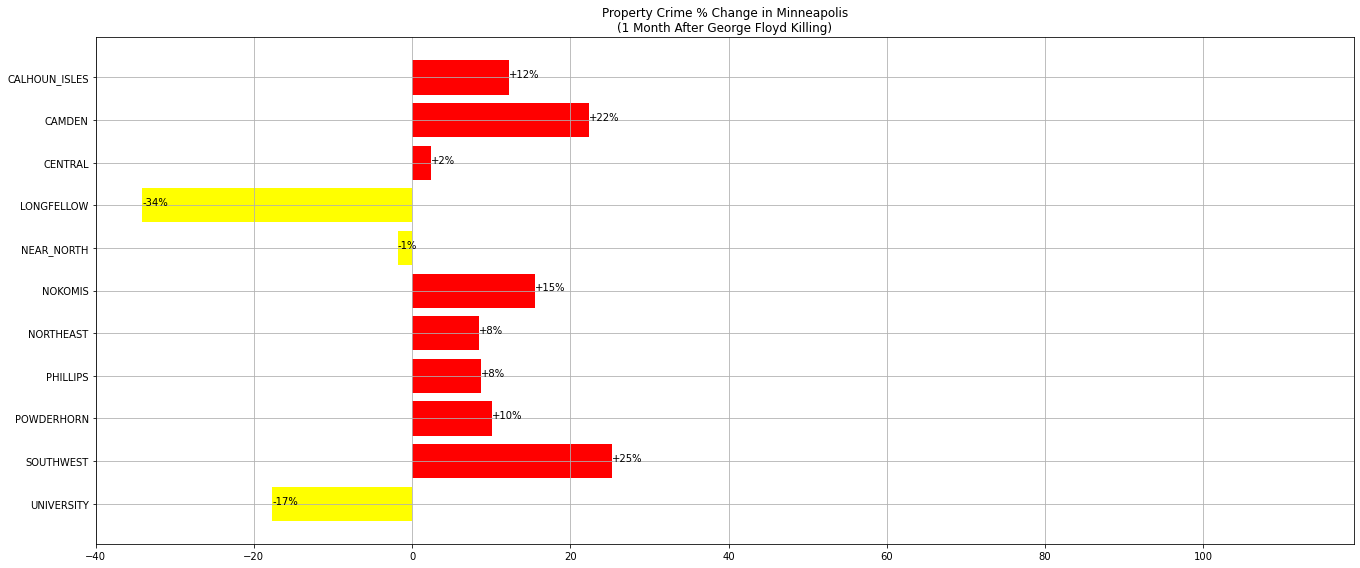

In [51]:
# % Change in Property Crime 1 Month Before and After GF  

plot_df_prop["positive"] = plot_df_prop["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_prop["%_Change"]
z = plot_df_prop["positive"]

plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"Property Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()
plt.tight_layout()

plt.savefig("Images/PercentChangeProperty.png")

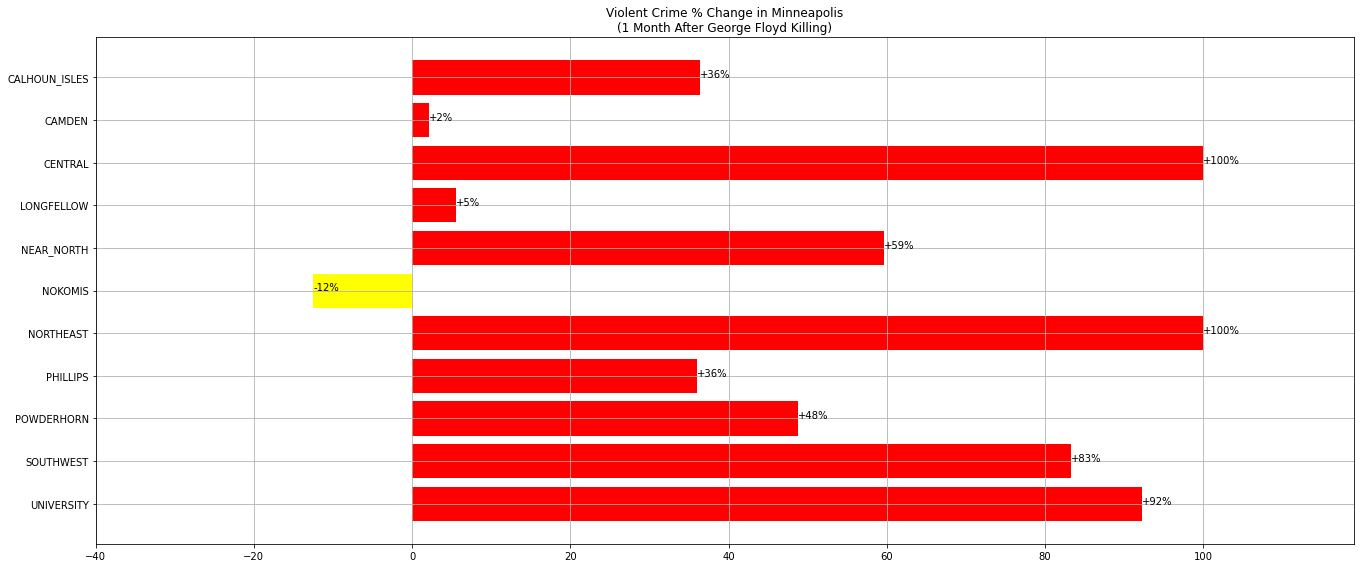

In [52]:
# % Change in Violent Crime 1 Month Before and After GF  

plot_df_viol["positive"] = plot_df_viol["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_viol["%_Change"]
z = plot_df_viol["positive"]


plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"Violent Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()

plt.tight_layout()

plt.savefig("Images/PercentChangeViolent.png")

In [53]:
plot_df_all = pd.DataFrame(index=COMMUNITIES, data={"All_Before":b_all, "All_After":a_all, \
                                                    "%_Change": 0, "Difference":0})
   
plot_df_all["%_Change"] = ((plot_df_all["All_After"] - plot_df_all["All_Before"]) / plot_df_all["All_Before"]) * 100
plot_df_all["Difference"] = plot_df_all["All_After"] - plot_df_all["All_Before"]

plot_df_all

,All_Before,All_After,%_Change,Difference
CALHOUN_ISLES,182,207,13.736264,25
CAMDEN,122,140,14.754098,18
CENTRAL,205,244,19.024390,39
LONGFELLOW,194,135,-30.412371,-59
NEAR_NORTH,178,216,21.348315,38
NOKOMIS,92,104,13.043478,12
NORTHEAST,117,136,16.239316,19
PHILLIPS,176,205,16.477273,29
POWDERHORN,289,334,15.570934,45
SOUTHWEST,93,120,29.032258,27


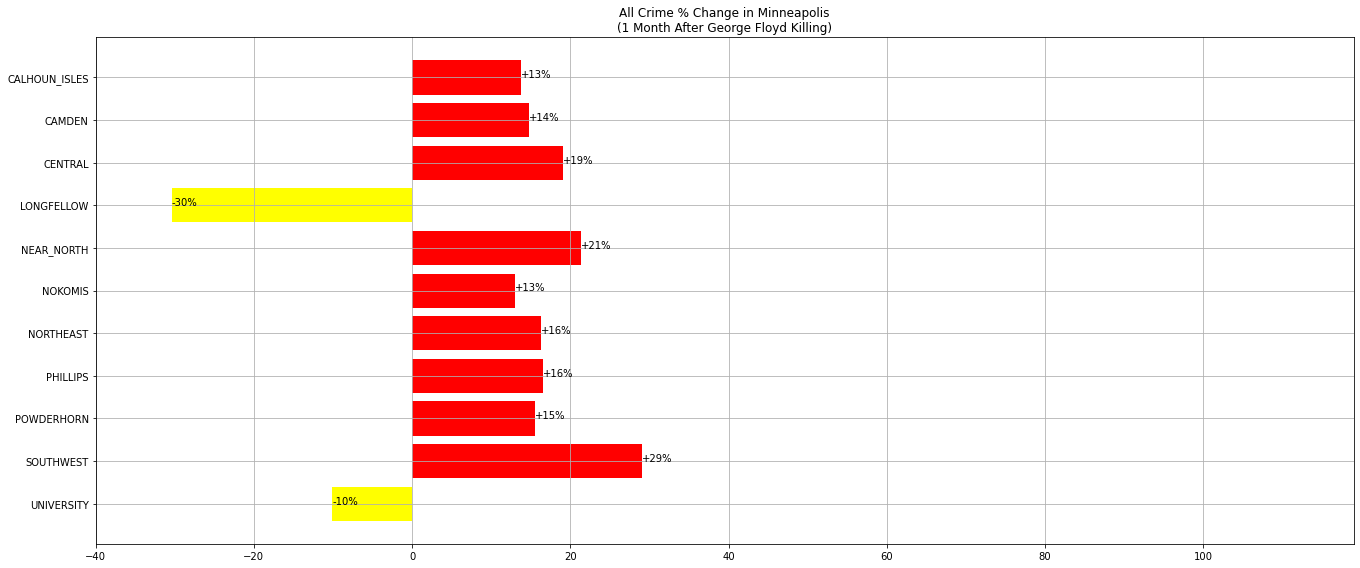

In [54]:
# % Change in Violent Crime 1 Month Before and After GF  

plot_df_all["positive"] = plot_df_all["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_all["%_Change"]
z = plot_df_all["positive"]

plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"All Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()

plt.tight_layout()

plt.savefig("Images/PercentChangeAll.png")

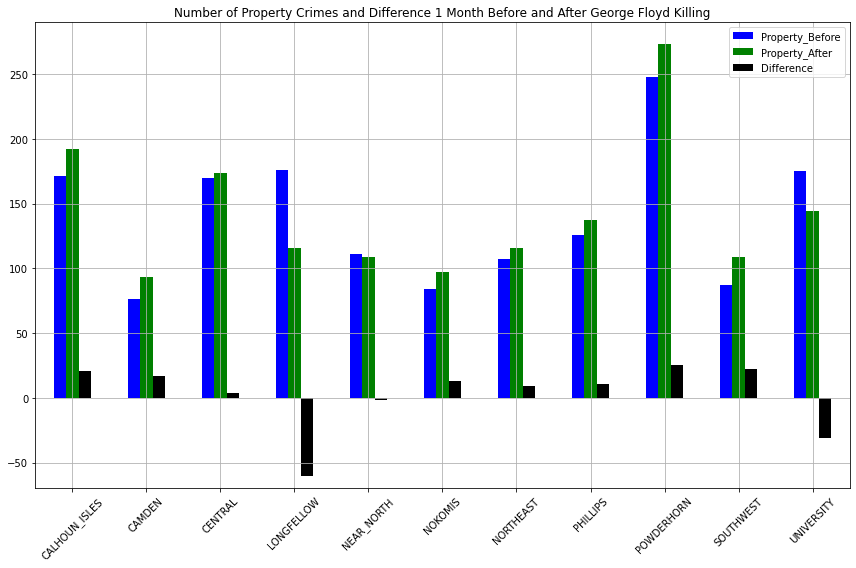

In [55]:
plot_df_prop[["Property_Before", "Property_After", "Difference"]].plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-70, 290)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Property Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("Images/Property_Before_After.png")

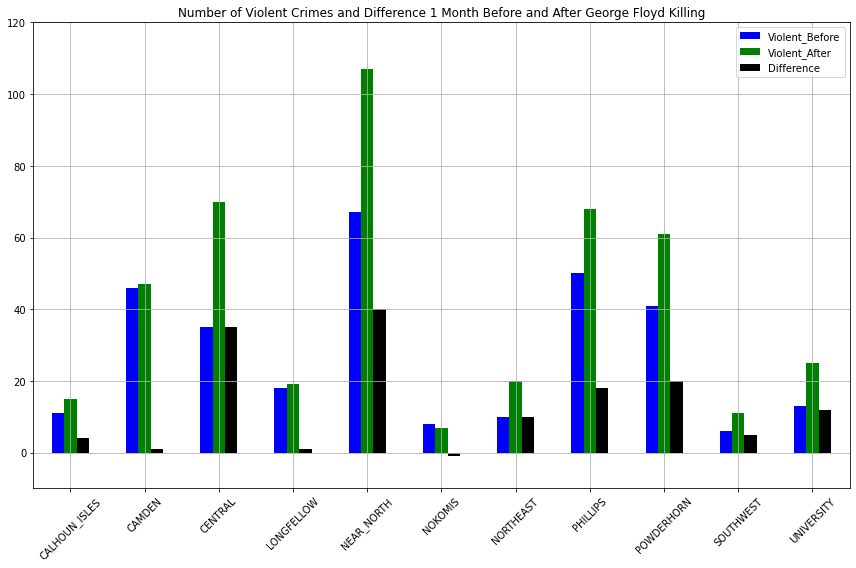

In [56]:
plot_df_viol[["Violent_Before", "Violent_After", "Difference"]].plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-10, 120)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Violent Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("Images/Violent_Before_After.png")

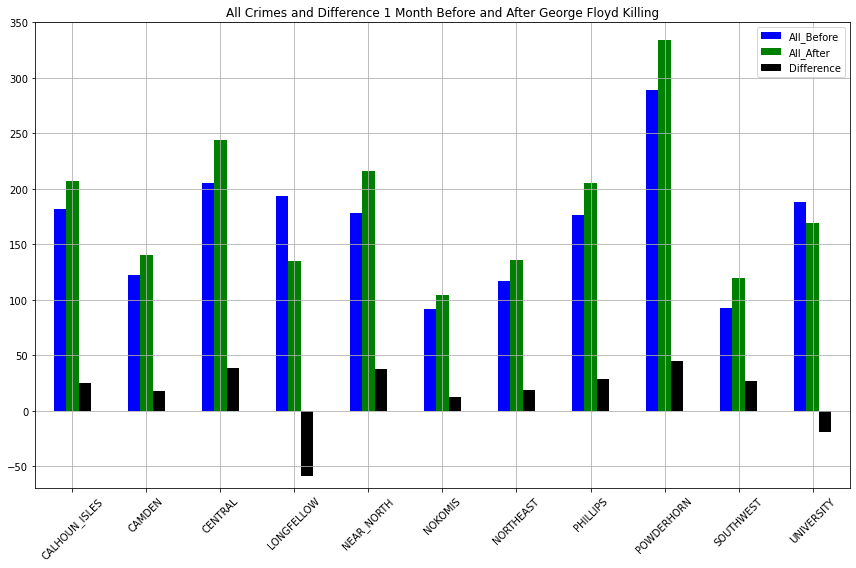

In [57]:
plot_df_all[["All_Before", "All_After", "Difference"]].plot.bar(color=["blue", "green", "black"], figsize=(12,8))

plt.ylim(-70, 350)
plt.xticks(rotation=45)
plt.grid()
plt.title("All Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("Images/All_Before_After.png")

In [58]:
# WILLIAM'S YEAR OVER YEAR ANALYSIS OF MAYS AND JUNES

# MAYS Y-over-Y

MAYS_LIST = []

MAYS_2018 = df[ (df["reportMonth"]==5) & (df["reportYear"]==2018) ]
MAYS_2019 = df[ (df["reportMonth"]==5) & (df["reportYear"]==2019) ]
MAYS_2020 = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) ]
MAYS_2021 = df[ (df["reportMonth"]==5) & (df["reportYear"]==2021) ]
MAYS_2022 = df[ (df["reportMonth"]==5) & (df["reportYear"]==2022) ]


MAYS_LIST.append(MAYS_2018["number"].sum())
MAYS_LIST.append(MAYS_2019["number"].sum())
MAYS_LIST.append(MAYS_2020["number"].sum())
MAYS_LIST.append(MAYS_2021["number"].sum())
MAYS_LIST.append(MAYS_2022["number"].sum())

# JUNES Y-over-Y

JUNES_LIST = []

JUNES_2018 = df[ (df["reportMonth"]==6) & (df["reportYear"]==2018) ]
JUNES_2019 = df[ (df["reportMonth"]==6) & (df["reportYear"]==2019) ]
JUNES_2020 = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) ]
JUNES_2021 = df[ (df["reportMonth"]==6) & (df["reportYear"]==2021) ]
JUNES_2022 = df[ (df["reportMonth"]==6) & (df["reportYear"]==2022) ]

JUNES_LIST.append(JUNES_2018["number"].sum())
JUNES_LIST.append(JUNES_2019["number"].sum())
JUNES_LIST.append(JUNES_2020["number"].sum())
JUNES_LIST.append(JUNES_2021["number"].sum())
JUNES_LIST.append(JUNES_2022["number"].sum())

MAYS_LIST
JUNES_LIST

[1764.0, 2253.0, 2010.0, 2088.0, 2644.0]

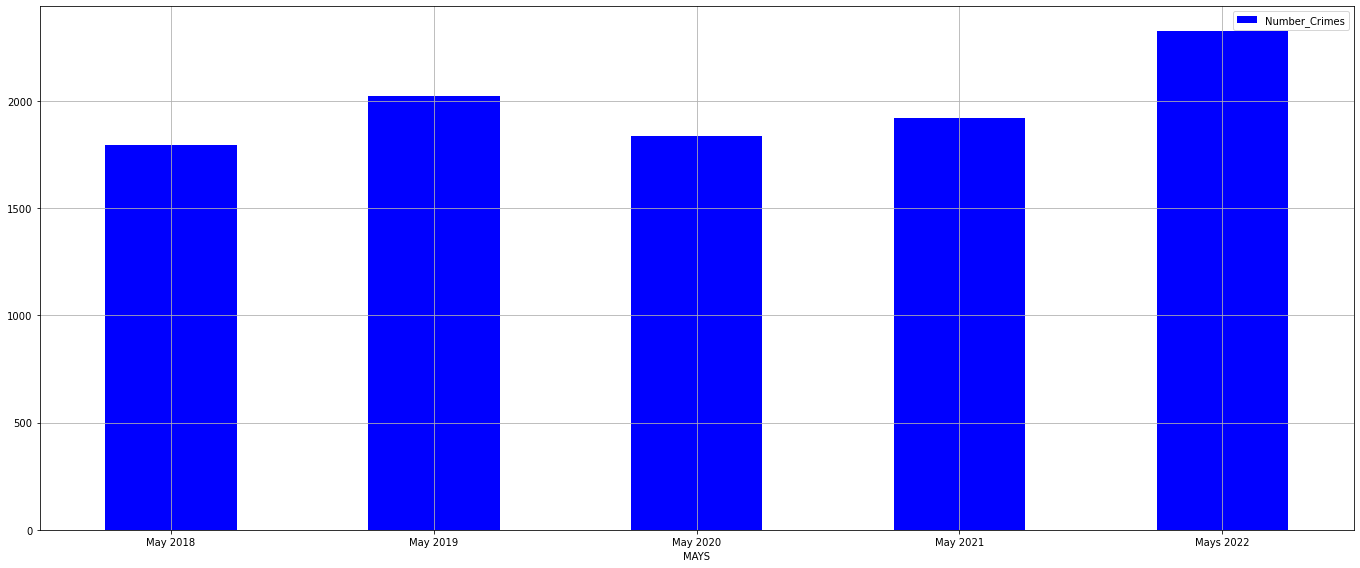

In [59]:
MAYS_df = pd.DataFrame({'MAYS':['May 2018', 'May 2019', 'May 2020', 'May 2021', "Mays 2022"], 'Number_Crimes':MAYS_LIST})

MAYS_df.plot.bar(x='MAYS', y='Number_Crimes', rot=0, color="blue")
plt.grid()
plt.tight_layout()

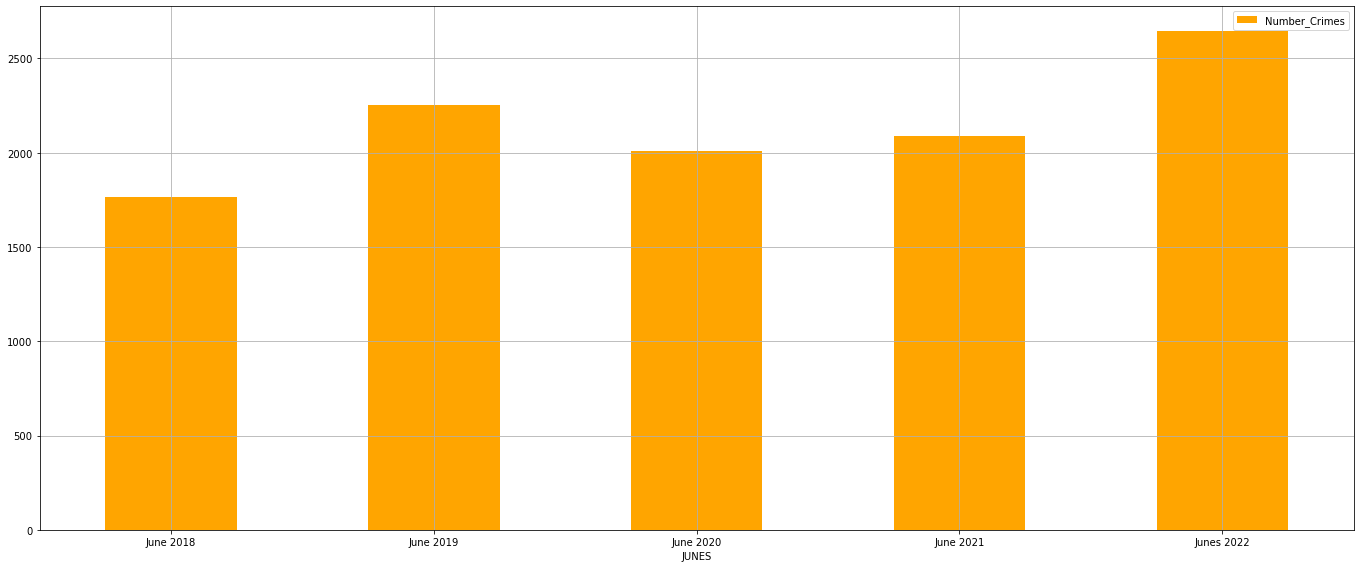

In [60]:
JUNES_df = pd.DataFrame({'JUNES':['June 2018', 'June 2019', 'June 2020', 'June 2021', "Junes 2022"], 'Number_Crimes':JUNES_LIST})

JUNES_df.plot.bar(x='JUNES', y='Number_Crimes', rot=0, color="orange")
plt.grid()
plt.tight_layout()

In [61]:
# T-test for property crime before and after GF

st.ttest_ind(bp, ap, equal_var=False) 

Ttest_indResult(statistic=-0.11594176548185957, pvalue=0.9088550319514616)

In [62]:
# T-test for violent crime before and after GF

st.ttest_ind(bv, av, equal_var=False) 

Ttest_indResult(statistic=-1.1424975576593623, pvalue=0.2689013645089005)

In [63]:
#End of William's Code
# T-test for all crime before and after GF

st.ttest_ind(b_all, a_all, equal_var=False) 

Ttest_indResult(statistic=-0.5902953307278089, pvalue=0.5617522529882506)

In [64]:
#Ilia's TTest variables
my_list_bf = before_df_plt["Number of Cases"].tolist()
my_list_af = After_df_plt["Number of Cases"].tolist()

In [65]:
#Ilia's TTest
st.ttest_ind(my_list_af, my_list_bf, equal_var=False)

Ttest_indResult(statistic=1.925793725429242, pvalue=0.06022527196564675)

In [66]:
st.ttest_ind(before_violent_cases_list,after_violent_cases_list, equal_var=False)

Ttest_indResult(statistic=-0.45243726308686233, pvalue=0.6686713891255816)

In [67]:
st.ttest_ind(before_property_cases_list,after_property_cases_list, equal_var=False)

Ttest_indResult(statistic=-0.048305062358812385, pvalue=0.963048404307157)

# William's Analysis

### Minneapolis has 87 officially recognized neighborhoods. 87 ticks on a plot seemed too unwieldy, so I searched for a way to group them.

### Upon examining our dataset, we discovered that some neighborhoods around the former “Lake Calhoun” also changed their names. Once we did some detective work on these name changes, we were able to tidy the dataset and arrive at the same number of data points per neighborhood. 

### It turns out that there are 11 officially recognized neighborhood “communities” which are conglomerate groups of individual neighborhoods, so I chose to arrange the data by these 11.  (https://en.wikipedia.org/wiki/Neighborhoods_of_Minneapolis)

### Our dataset was ordered by date, neighborhood, and type of crime. There were 8 types of crimes, with 4 being property crimes and 4 being violent crimes.

### Property crime categories = Arson, Auto Theft, Burglary,  Larceny 
(https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/property-crime)

### Violent crime categories = Aggravated Assault, Homicide, Rape, Robbery
(https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/violent-crime)

### In order to understand any relationship between the George Floyd killing and crime in Minneapolis, I thought it prudent to examine crime data for the month before the killing and the month after the killing (George Floyd was killed on 5/25/2020, so we used 6/1/2020 as our midpoint.  We considered all of 5/2020 as 1 month before, and all of 6/2020 data as 1 month after.) 

### I looked at changes in numbers of property and violent crimes by neighborhood community, then also calculated % change for this time period.